<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day3_neural_nets_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Can save model as h5 file, saves the input structure

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from keras.metrics import RootMeanSquaredError

# Initialise random seed
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# Load in weather dataset
url = 'https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1'
data = pd.read_csv(url)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
# Define inputs and outputs
nr_rows = 365*3
X_data = data.loc[:nr_rows].drop(columns=['DATE', 'MONTH'])   # input: time of year
y_data = data.loc[1:(nr_rows + 1)]['BASEL_sunshine']  # output: sunshine index?

In [5]:
X_data.shape, y_data.shape

((1096, 89), (1096,))

In [6]:
X_data

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,8,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,7,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,3,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,7,0.82,1.0020,0.36,0.00,1.0,8.2,6.7,10.4,8,...,-5.9,-6.8,-5.0,0.88,0.9945,0.09,0.32,11.0,8.2,13.9
1092,8,0.90,1.0041,0.10,0.26,0.0,7.3,5.2,9.3,8,...,-6.4,-7.1,-5.7,0.92,1.0072,0.26,0.40,8.3,6.0,10.6
1093,8,0.79,1.0126,0.16,0.17,0.0,7.8,6.1,13.0,8,...,-9.6,-12.2,-7.0,0.94,1.0107,0.10,0.28,10.5,8.2,12.8
1094,8,0.65,1.0077,0.15,0.00,0.0,12.5,9.7,14.7,8,...,-6.3,-8.5,-4.0,0.88,1.0069,0.34,0.18,11.4,9.6,13.1


In [7]:
# Prepare data for training
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X_data, y_data, test_size = 0.3)

X_val, X_test, y_val, y_test = train_test_split(
    X_holdout, y_holdout, test_size = 0.5)

In [8]:
X_holdout

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
997,8,0.94,1.0141,0.21,1.84,0.0,6.3,5.3,7.6,2,...,-4.9,-7.2,-2.5,0.67,1.0187,1.45,0.00,10.6,6.5,14.8
435,8,0.83,1.0135,0.32,1.44,0.0,11.8,9.5,13.8,8,...,-6.5,-8.6,-4.3,0.86,1.0097,0.42,0.14,14.2,11.8,16.5
1030,6,0.63,1.0202,0.41,0.00,1.4,14.1,7.1,21.6,7,...,-5.7,-8.3,-3.0,0.78,1.0226,0.91,0.08,14.1,11.9,16.3
737,6,0.92,1.0320,0.34,0.00,0.3,-4.4,-7.2,-2.3,8,...,-11.3,-14.4,-8.2,0.88,1.0289,0.23,0.02,1.0,-1.1,3.1
801,7,0.48,1.0160,1.45,0.00,5.5,12.6,6.4,19.4,8,...,-5.6,-7.2,-4.0,0.87,1.0116,0.37,0.16,9.9,7.6,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,6,0.84,1.0139,1.15,0.00,1.8,8.1,3.9,13.1,8,...,-6.7,-8.5,-4.8,0.86,1.0077,0.79,0.40,10.1,6.5,13.7
1045,6,0.82,1.0108,0.34,0.57,2.4,10.5,6.0,14.4,4,...,-7.9,-12.3,-3.4,0.86,1.0118,0.66,0.02,12.6,10.0,15.1
769,8,0.91,1.0280,0.29,0.58,0.0,4.7,2.7,6.7,8,...,-8.7,-11.4,-6.0,0.96,1.0251,0.17,0.02,9.4,7.5,11.4
985,5,0.78,1.0192,1.38,0.00,5.3,15.2,11.4,21.1,1,...,-2.0,-3.2,-0.7,0.81,1.0193,1.33,0.00,15.9,12.1,19.7


In [9]:
def create_nn():
  inputs = keras.Input(shape = (X_data.shape[1],))
  layers_dense = keras.layers.Dense(100, 'relu')(inputs)
  layers_dense2 = keras.layers.Dense(50, 'relu')(layers_dense)
  outputs = keras.layers.Dense(1)(layers_dense2)
  model = keras.Model(inputs = inputs, outputs = outputs,
                      name = 'weather_base_model')
  return model

model = create_nn()

In [10]:
model.summary()

Model: "weather_base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 89)]              0         
                                                                 
 dense (Dense)               (None, 100)               9000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14101 (55.08 KB)
Trainable params: 14101 (55.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
def compile_model(model):
  model.compile(optimizer = 'adam', loss = 'mse',
                metrics = [keras.metrics.RootMeanSquaredError()]) # note 'mse' is mean squared error, we want to use RMSE

compile_model(model)

In [12]:
# verbose: amount of info provided
# verbose=0 will show you nothing (silent)
# verbose=1 will show you an animated progress bar like this: progres_bar
# verbose=2 will just mention the number of epoch like this

history = model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=2)

Epoch 1/200
24/24 - 3s - loss: 27.3543 - root_mean_squared_error: 5.2301 - 3s/epoch - 110ms/step
Epoch 2/200
24/24 - 0s - loss: 14.0395 - root_mean_squared_error: 3.7469 - 137ms/epoch - 6ms/step
Epoch 3/200
24/24 - 0s - loss: 12.9241 - root_mean_squared_error: 3.5950 - 151ms/epoch - 6ms/step
Epoch 4/200
24/24 - 0s - loss: 12.4283 - root_mean_squared_error: 3.5254 - 90ms/epoch - 4ms/step
Epoch 5/200
24/24 - 0s - loss: 12.0299 - root_mean_squared_error: 3.4684 - 67ms/epoch - 3ms/step
Epoch 6/200
24/24 - 0s - loss: 11.7193 - root_mean_squared_error: 3.4234 - 70ms/epoch - 3ms/step
Epoch 7/200
24/24 - 0s - loss: 11.1222 - root_mean_squared_error: 3.3350 - 84ms/epoch - 4ms/step
Epoch 8/200
24/24 - 0s - loss: 10.7754 - root_mean_squared_error: 3.2826 - 72ms/epoch - 3ms/step
Epoch 9/200
24/24 - 0s - loss: 10.7363 - root_mean_squared_error: 3.2766 - 73ms/epoch - 3ms/step
Epoch 10/200
24/24 - 0s - loss: 10.5508 - root_mean_squared_error: 3.2482 - 71ms/epoch - 3ms/step
Epoch 11/200
24/24 - 0s - l

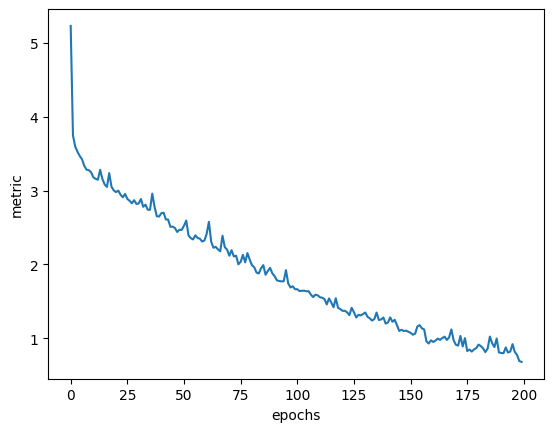

In [13]:
def plot_history(history, metrics):

  history_df = pd.DataFrame.from_dict(history.history)
  sns.lineplot(data=history_df[metrics])
  plt.xlabel("epochs")
  plt.ylabel("metric")

plot_history(history, 'root_mean_squared_error')

6/6 [==============================] - 0s 6ms/step


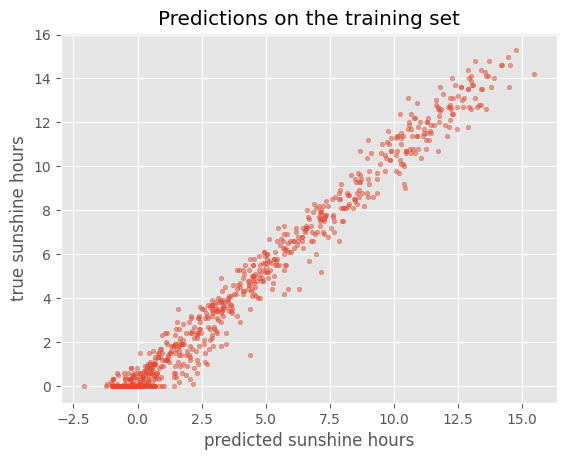

In [15]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

def plot_predictions(y_pred, y_true, title):
  plt.style.use('ggplot')
  plt.scatter(y_pred, y_true, s=10, alpha=0.5)
  plt.xlabel("predicted sunshine hours")
  plt.ylabel("true sunshine hours")
  plt.title(title)

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

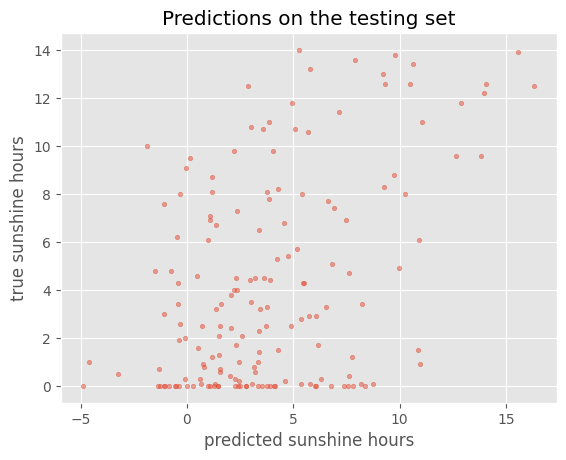

In [17]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the testing set')

In [18]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)

6/6 [==============================] - 0s 3ms/step - loss: 18.6490 - root_mean_squared_error: 4.3185


In [19]:
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(
    train_metrics['root_mean_squared_error'],
    test_metrics['root_mean_squared_error']))

Train RMSE: 0.73, Test RMSE: 4.32


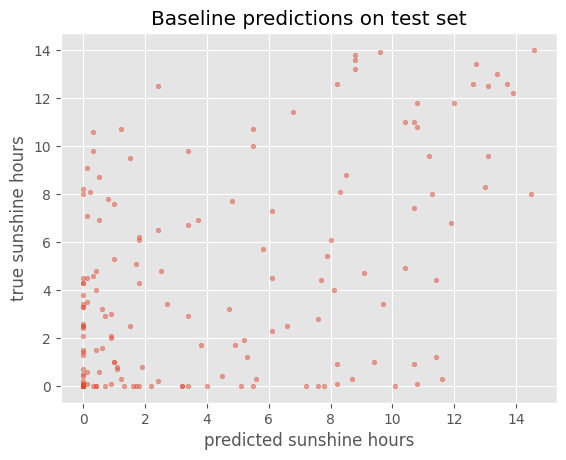

In [20]:
# How to mitigate overfitting? Use BASEL sunshine as a baseline constraint for model predictions
y_baseline_prediction = X_test['BASEL_sunshine']
plot_predictions(y_baseline_prediction, y_test,
                 'Baseline predictions on test set')

In [26]:
from sklearn.metrics import mean_squared_error
from keras.metrics import RootMeanSquaredError

rmse_baseline = mean_squared_error(y_test, y_baseline_prediction, squared=False)
rmse_keras = RootMeanSquaredError()
rmse_keras.update_state(y_test, y_baseline_prediction)

print('SKLearn RMSE baseline:', rmse_baseline)
print('Keras RMSE baseline:', rmse_keras.result().numpy())
print('NN RMSE score:', test_metrics['root_mean_squared_error'])

SKLearn RMSE baseline: 4.351217175583277
Keras RMSE baseline: 4.351217
NN RMSE score: 4.318453311920166


In [30]:
# Why do we need validation dataset?
history = model.fit(X_train, y_train, batch_size=32, epochs=200,
                    validation_data = (X_val, y_val), verbose = 0)

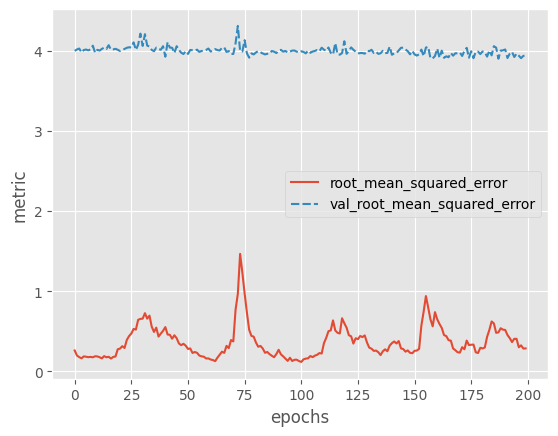

In [32]:
plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])